<a href="https://colab.research.google.com/github/sakshisinha-13/Financial-Portfolio-Analysis/blob/main/Financial_Portfolio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats
from pandas.testing import assert_frame_equal

import math
import seaborn as sns
import datetime as dt
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from pylab import rcParams
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [125]:
!pip install yfinance
!pip install yahoofinancials

In [126]:
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf
GOOG = yf.download("GOOG", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Google
MSFT = yf.download("MSFT", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Microsoft

print(GOOG.shape,MSFT.shape)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(2673, 6) (2673, 6)


In [127]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,15.569143,15.751460,14.861794,14.953949,14.936952,239835606
2012-05-21,14.956689,15.334772,14.943986,15.295419,15.278033,123477094
2012-05-22,15.278732,15.287947,14.844360,14.963912,14.946903,122533571
2012-05-23,14.985082,15.183090,14.872255,15.179603,15.162349,127600492
2012-05-24,15.172131,15.240873,14.915842,15.035145,15.018055,75935562


In [128]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,29.790001,29.809999,29.170000,29.270000,23.443846,56205300
2012-05-21,29.100000,29.790001,29.059999,29.750000,23.828300,38787900
2012-05-22,29.690001,29.879999,29.500000,29.760000,23.836308,39504900
2012-05-23,29.350000,29.400000,28.639999,29.110001,23.315687,65171000
2012-05-24,29.160000,29.299999,28.760000,29.070000,23.283651,52575000


In [129]:
GOOG.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [130]:
MSFT.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [131]:
#Combining dataframes
dataset = pd.concat([GOOG.Close,MSFT.Close],axis=1)
# Change the column names
dataset.columns =['GOOG','MSFT']
dataset.head()

,GOOG,MSFT
Date,,
2012-05-18,14.953949,29.270000
2012-05-21,15.295419,29.750000
2012-05-22,14.963912,29.760000
2012-05-23,15.179603,29.110001
2012-05-24,15.035145,29.070000


In [132]:
print('Shape of data',dataset.shape)

Shape of data (2673, 2)


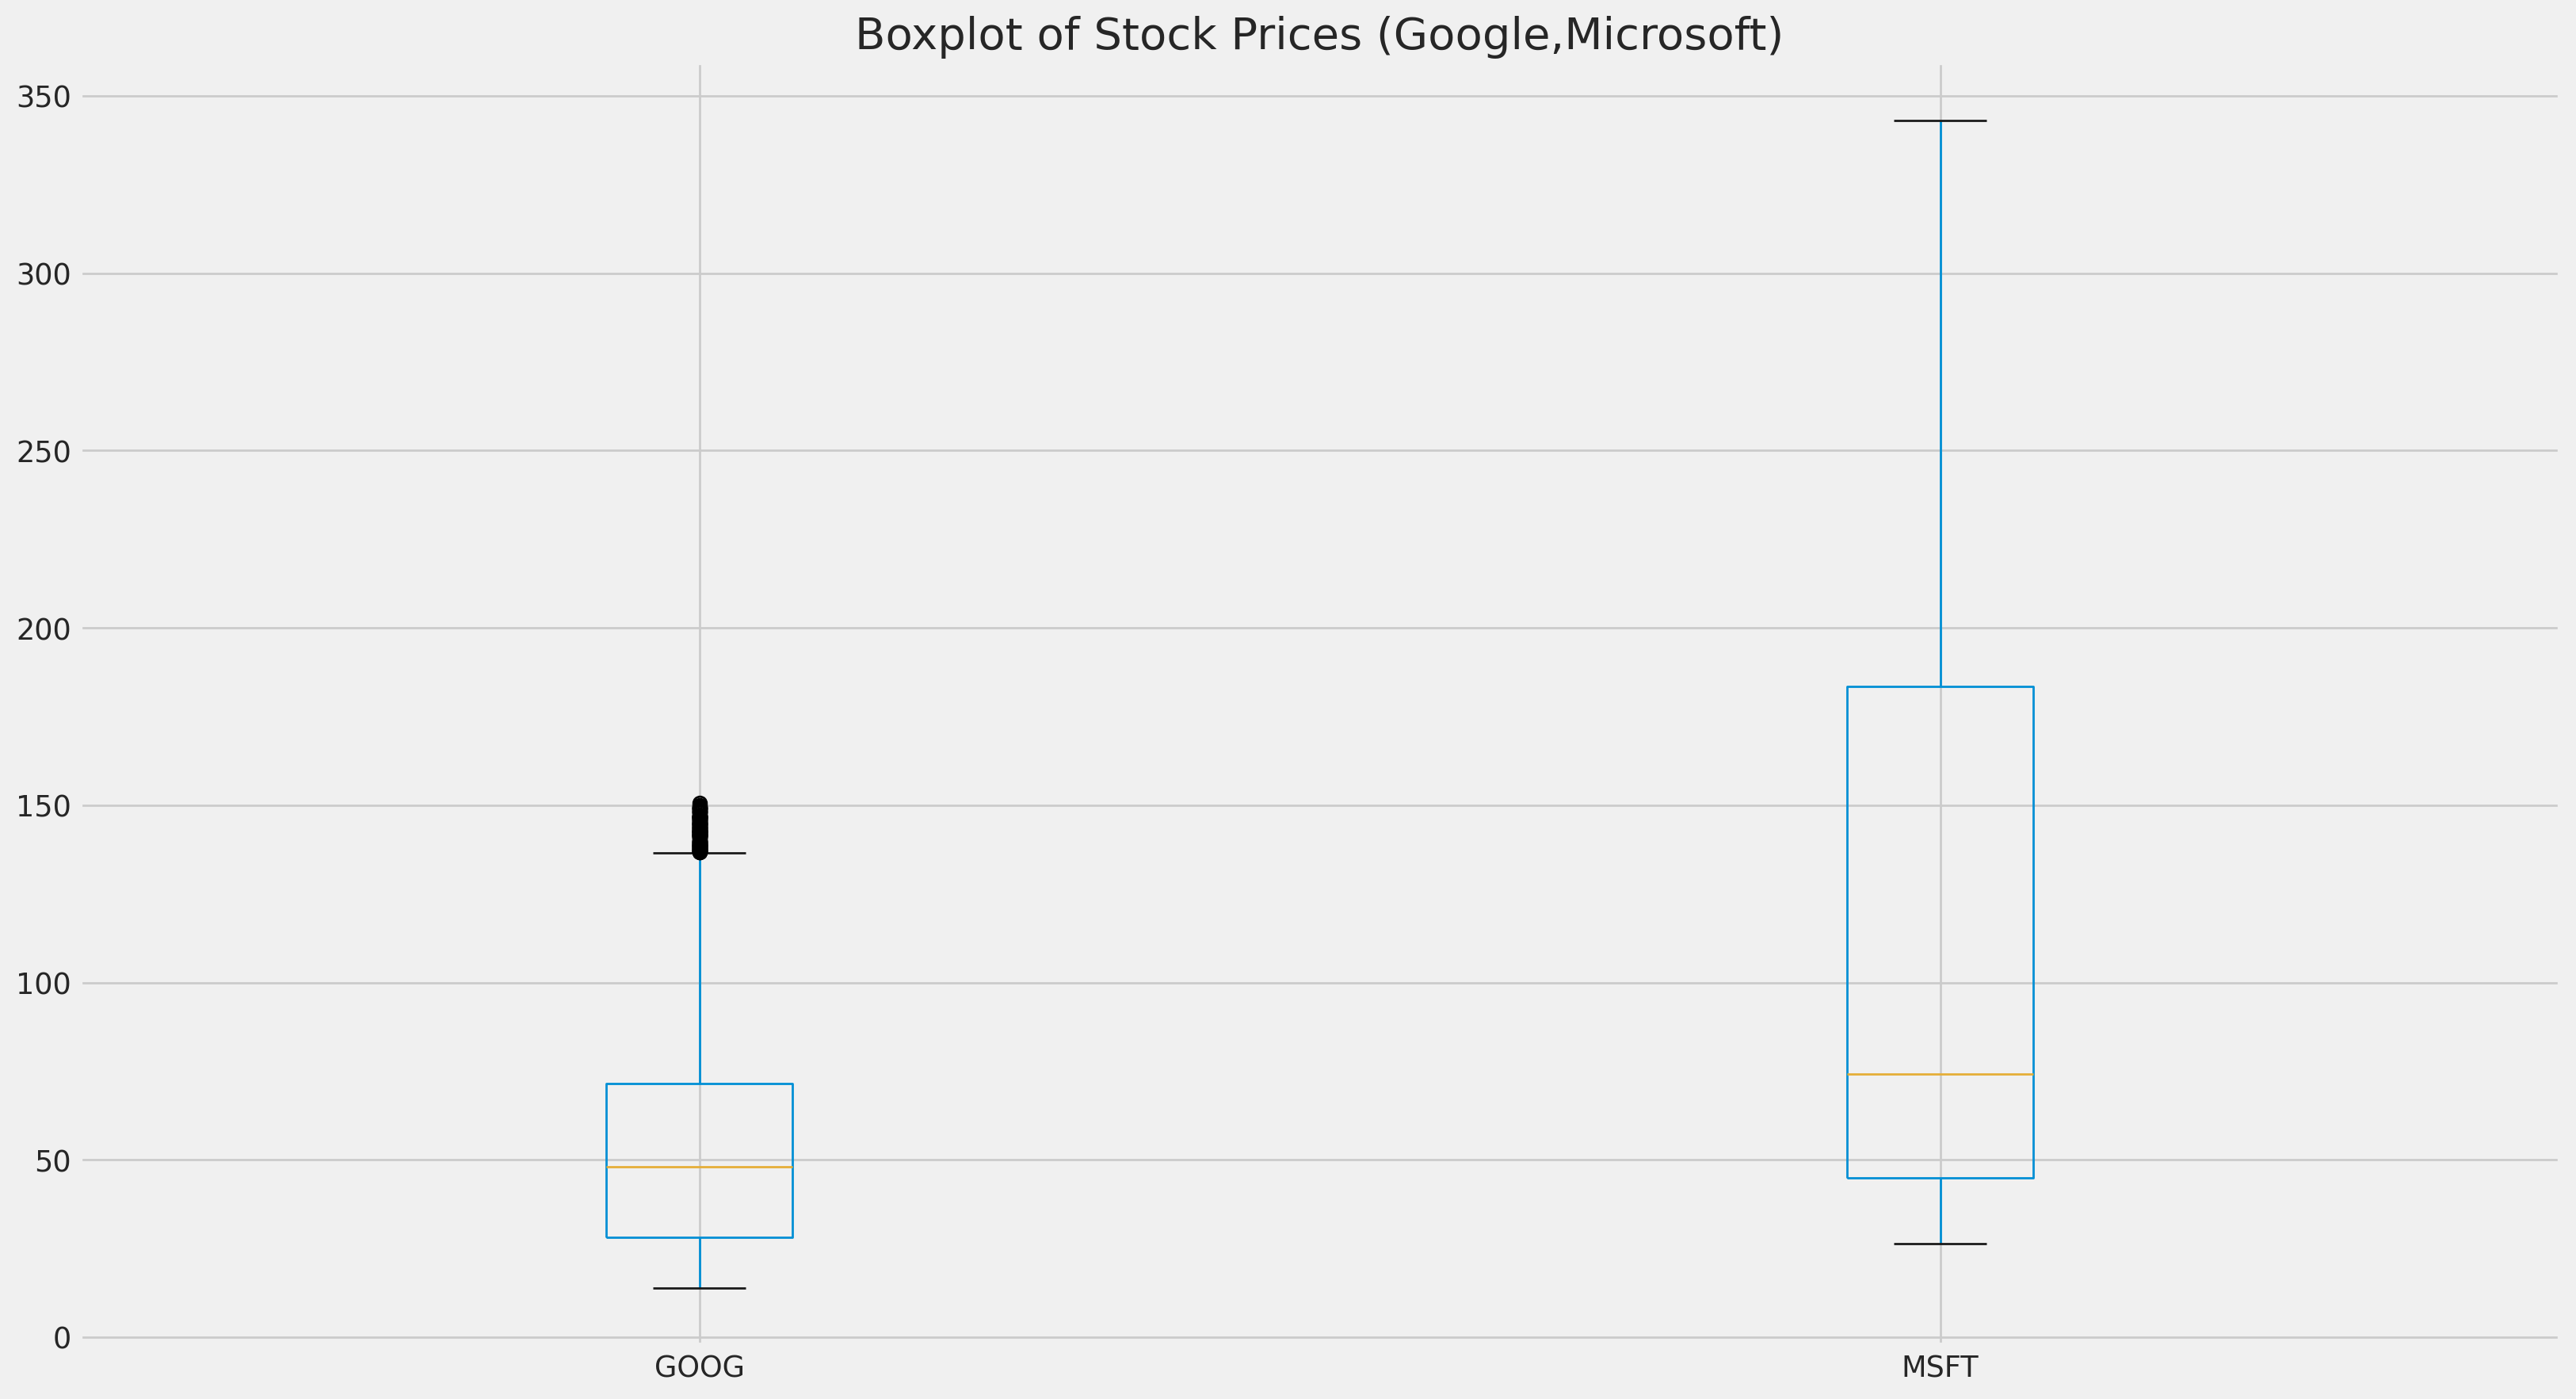

In [133]:
plt.style.use("fivethirtyeight")
dataset[['GOOG','MSFT']].boxplot()
plt.title("Boxplot of Stock Prices (Google,Microsoft)")
plt.show()

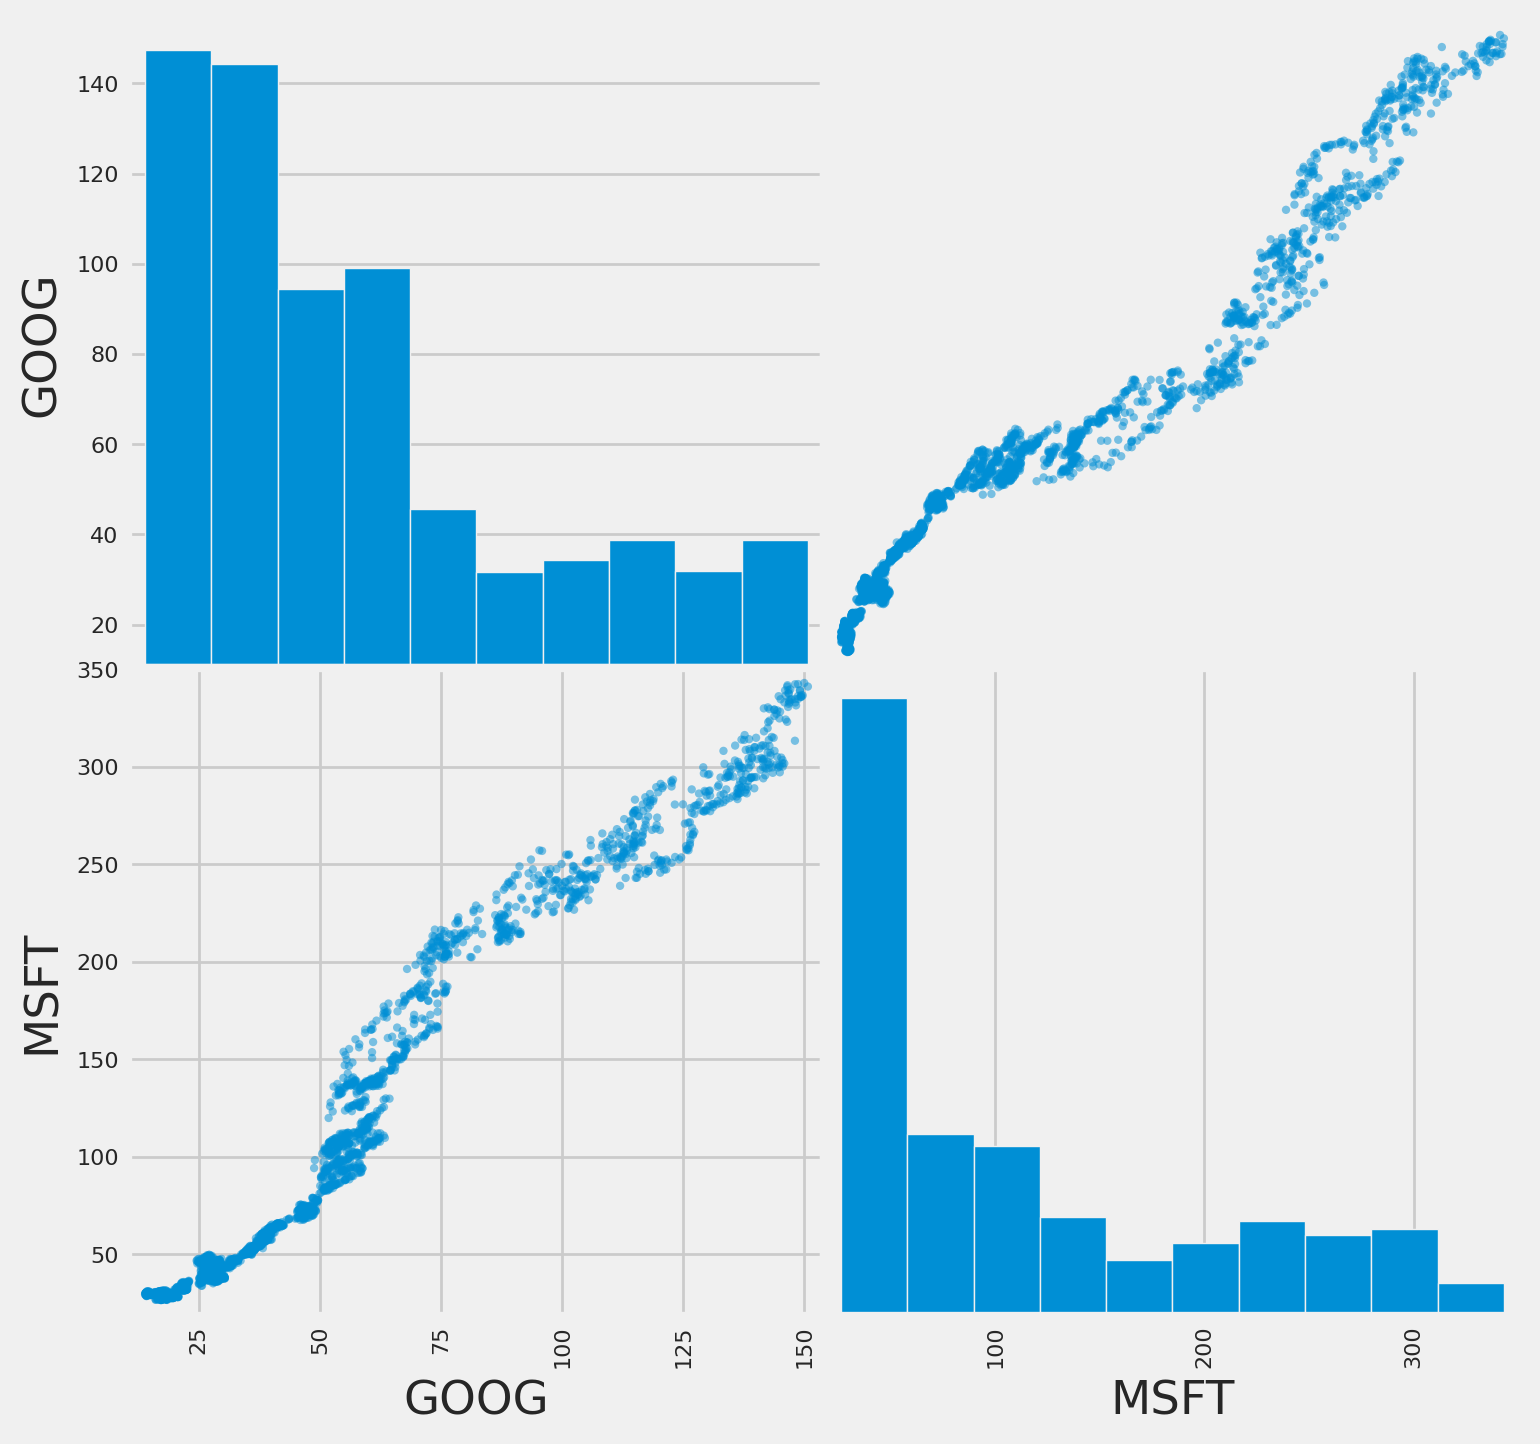

In [134]:
#dataset.hist(figsize=(10,10))
pd.plotting.scatter_matrix(dataset[['GOOG','MSFT']], figsize=(8,8))
plt.show()

In [135]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)

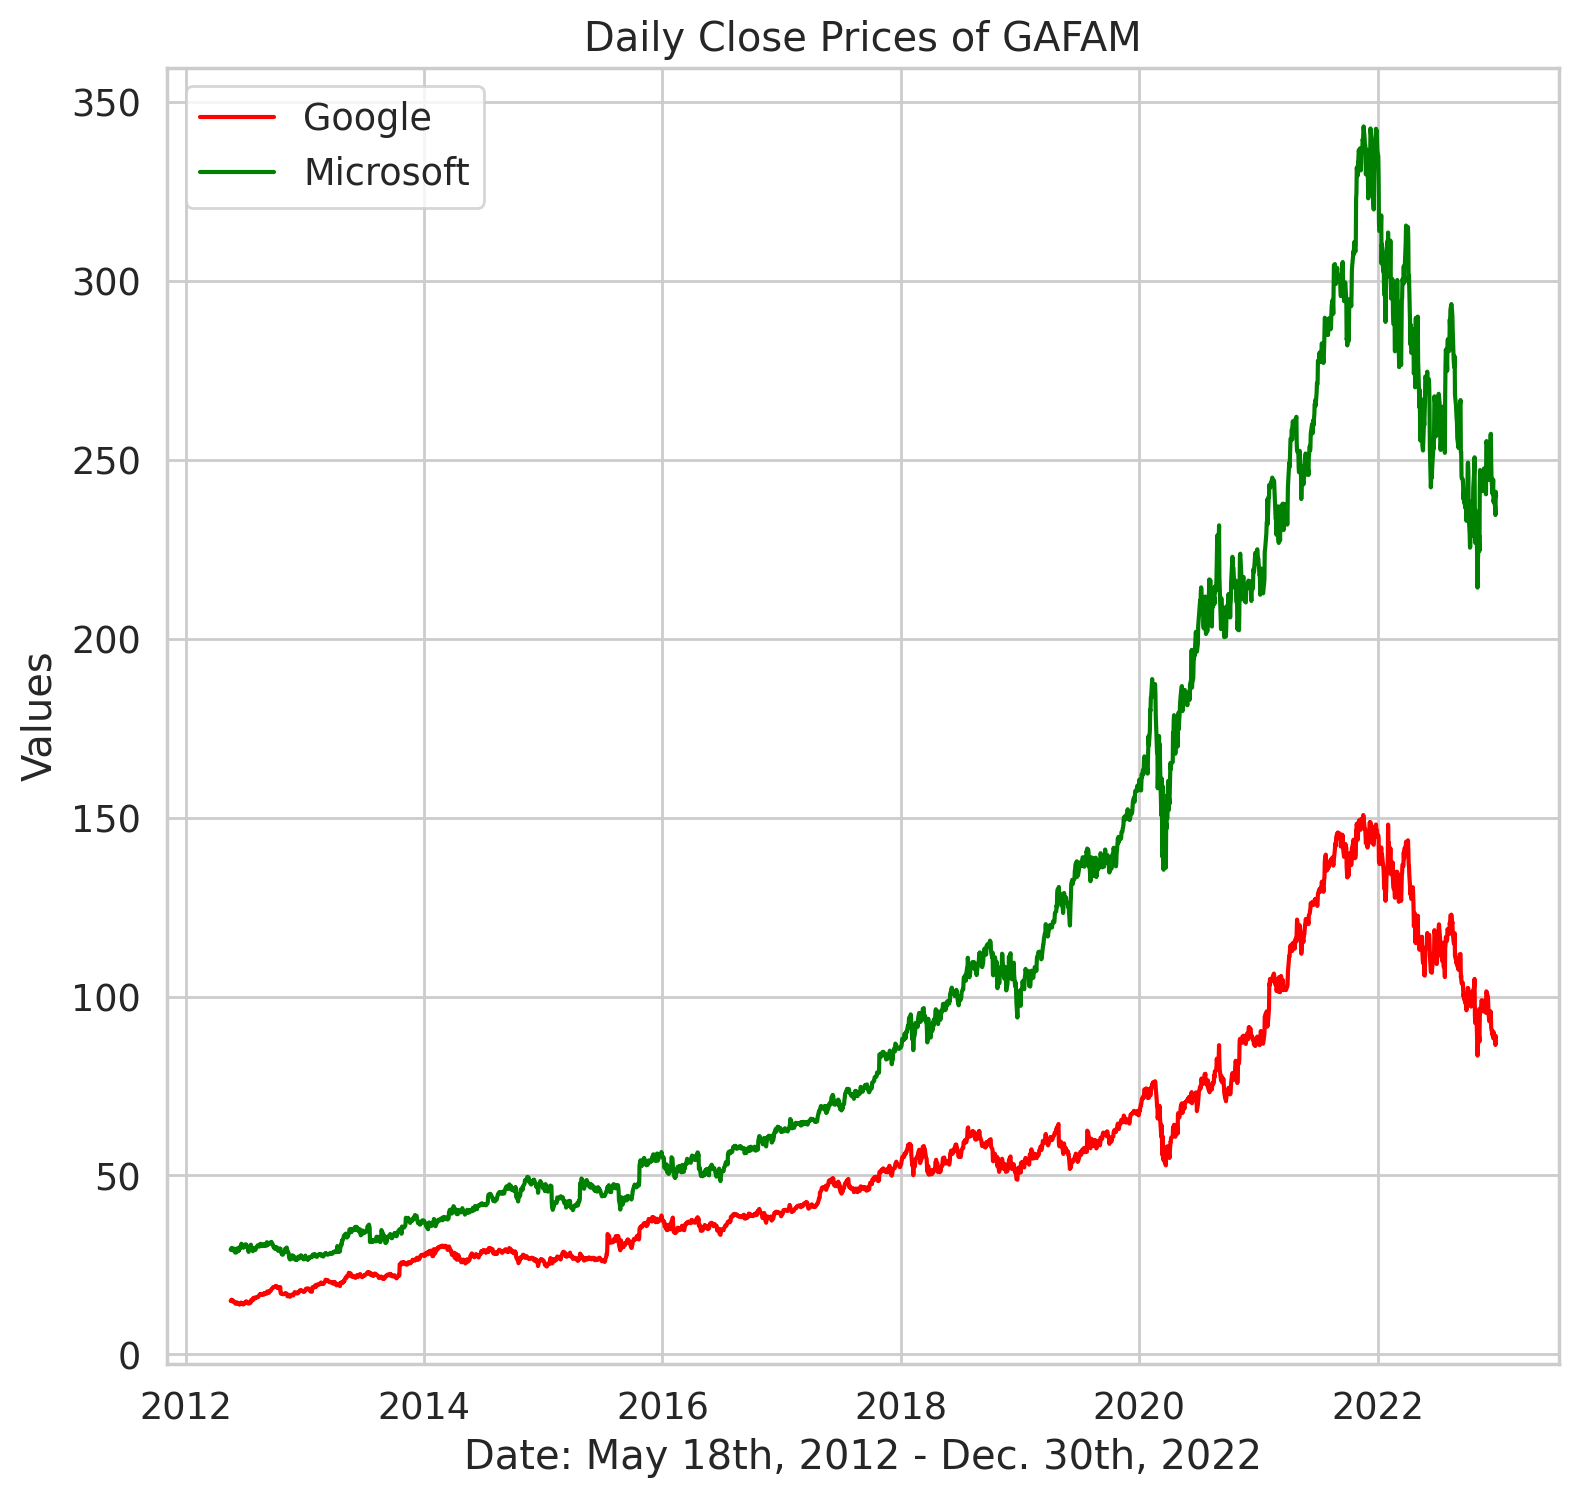

In [136]:
plt.figure(figsize=(8,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of GAFAM')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GOOG'], 'red', label='Google')
plt.plot(dataset['MSFT'], 'green', label='Microsoft')
plt.legend()
plt.show()

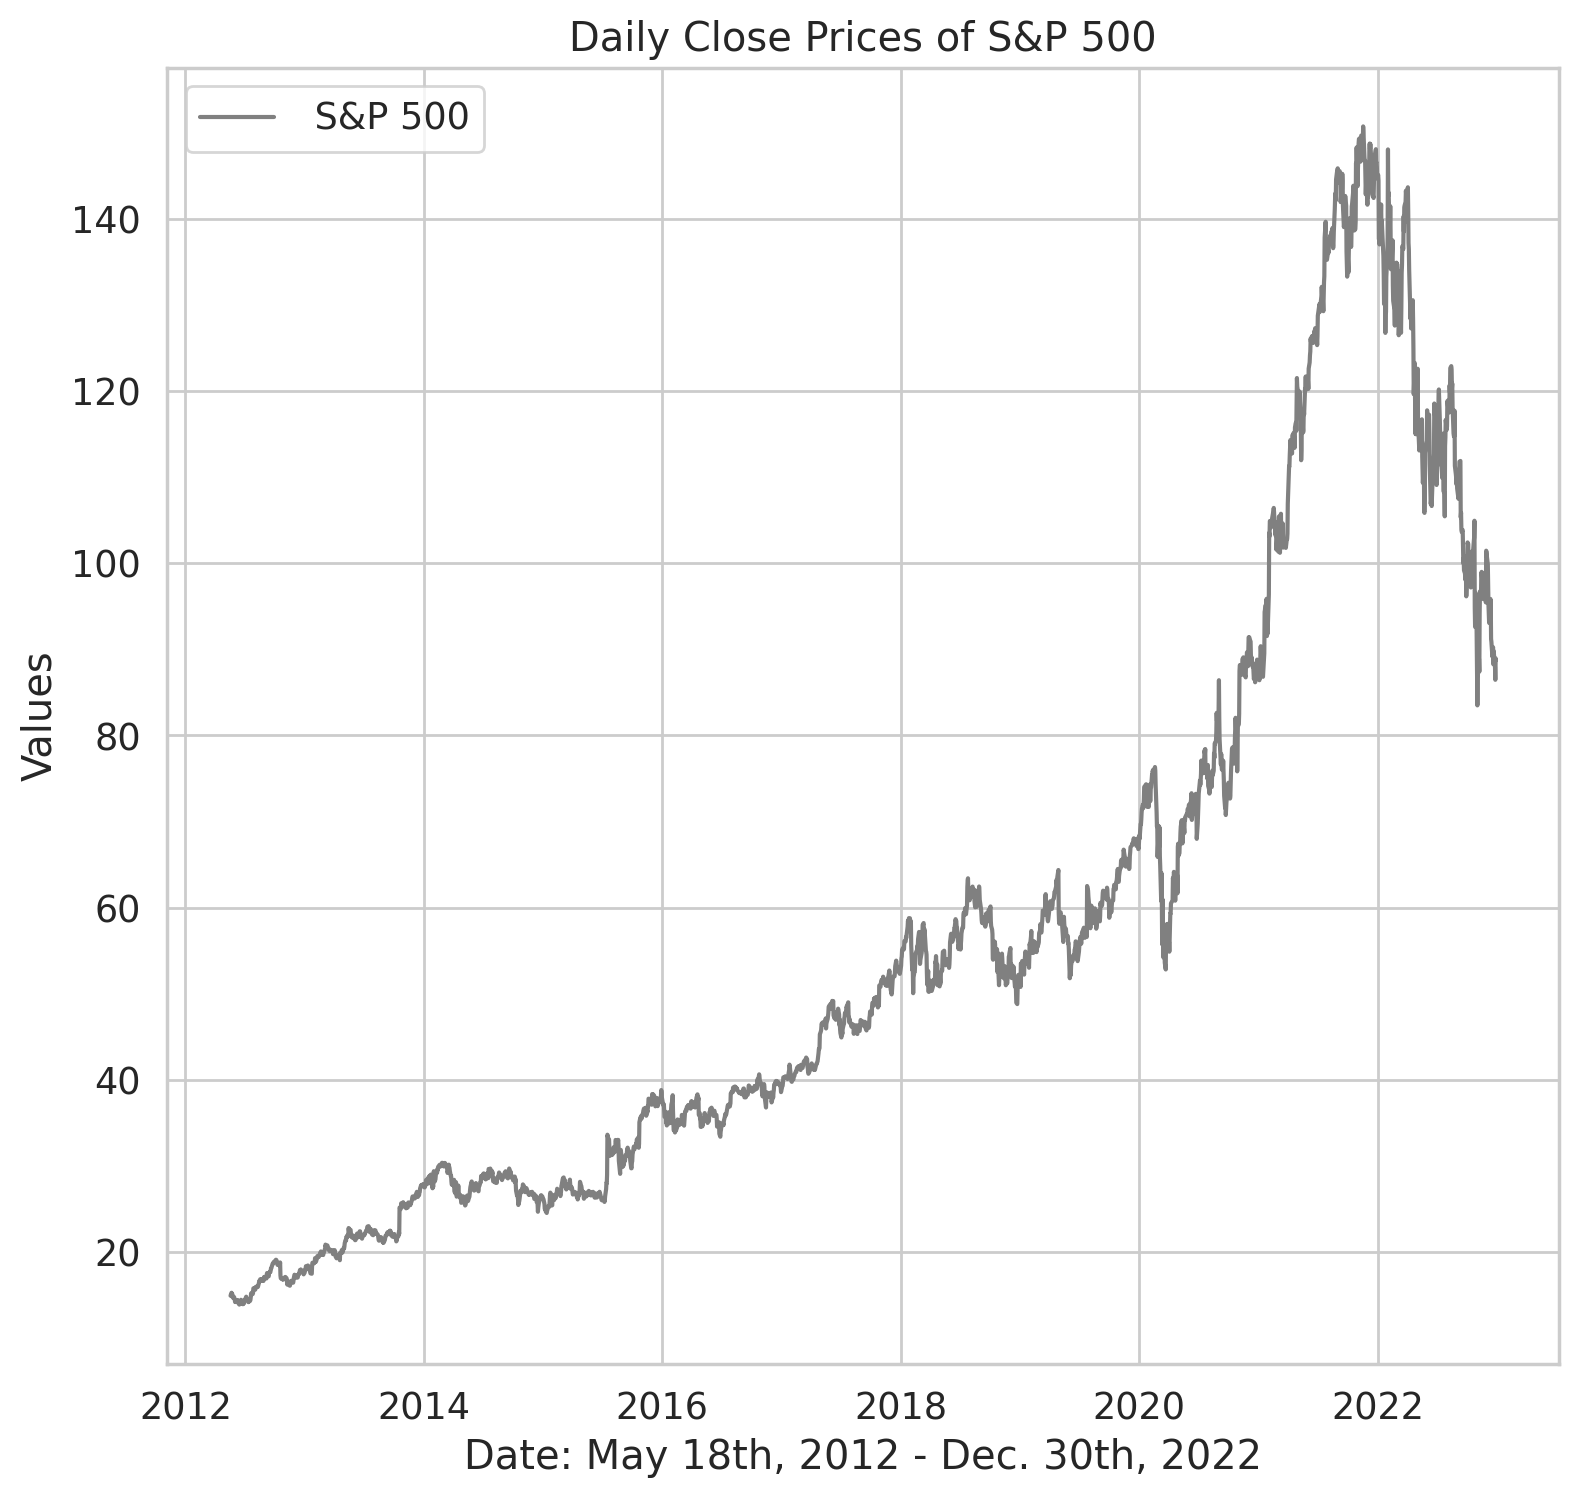

In [137]:
plt.figure(figsize=(8,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of S&P 500')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GOOG'], 'grey', label=' S&P 500')
plt.legend()
plt.show()

In [138]:
#Create a new columns Return in the dataset for each company's

dataset['R_GOOG'] = dataset[['GOOG']].pct_change(1)
dataset['R_MSFT'] = dataset[['MSFT']].pct_change(1)

dataset.head()

,GOOG,MSFT,R_GOOG,R_MSFT
Date,,,,
2012-05-18,14.953949,29.270000,NaN,NaN
2012-05-21,15.295419,29.750000,0.022835,0.016399
2012-05-22,14.963912,29.760000,-0.021674,0.000336
2012-05-23,15.179603,29.110001,0.014414,-0.021841
2012-05-24,15.035145,29.070000,-0.009517,-0.001374


In [139]:
dataset.describe()

,GOOG,MSFT,R_GOOG,R_MSFT
count,2673.000000,2673.000000,2672.000000,2672.000000
mean,56.827974,116.448706,0.000809,0.000930
std,35.578551,89.866126,0.016898,0.016856
min,13.924059,26.370001,-0.111008,-0.147390
25%,28.241163,44.830002,-0.006764,-0.006850
50%,47.955502,74.190002,0.000688,0.000681
75%,71.591003,183.429993,0.008903,0.009257
max,150.709000,343.109985,0.160524,0.142169


In [140]:
# Daily volatility (in %) of each stock
dataset[['R_GOOG','R_MSFT']].std()

,0
R_GOOG,0.016898
R_MSFT,0.016856


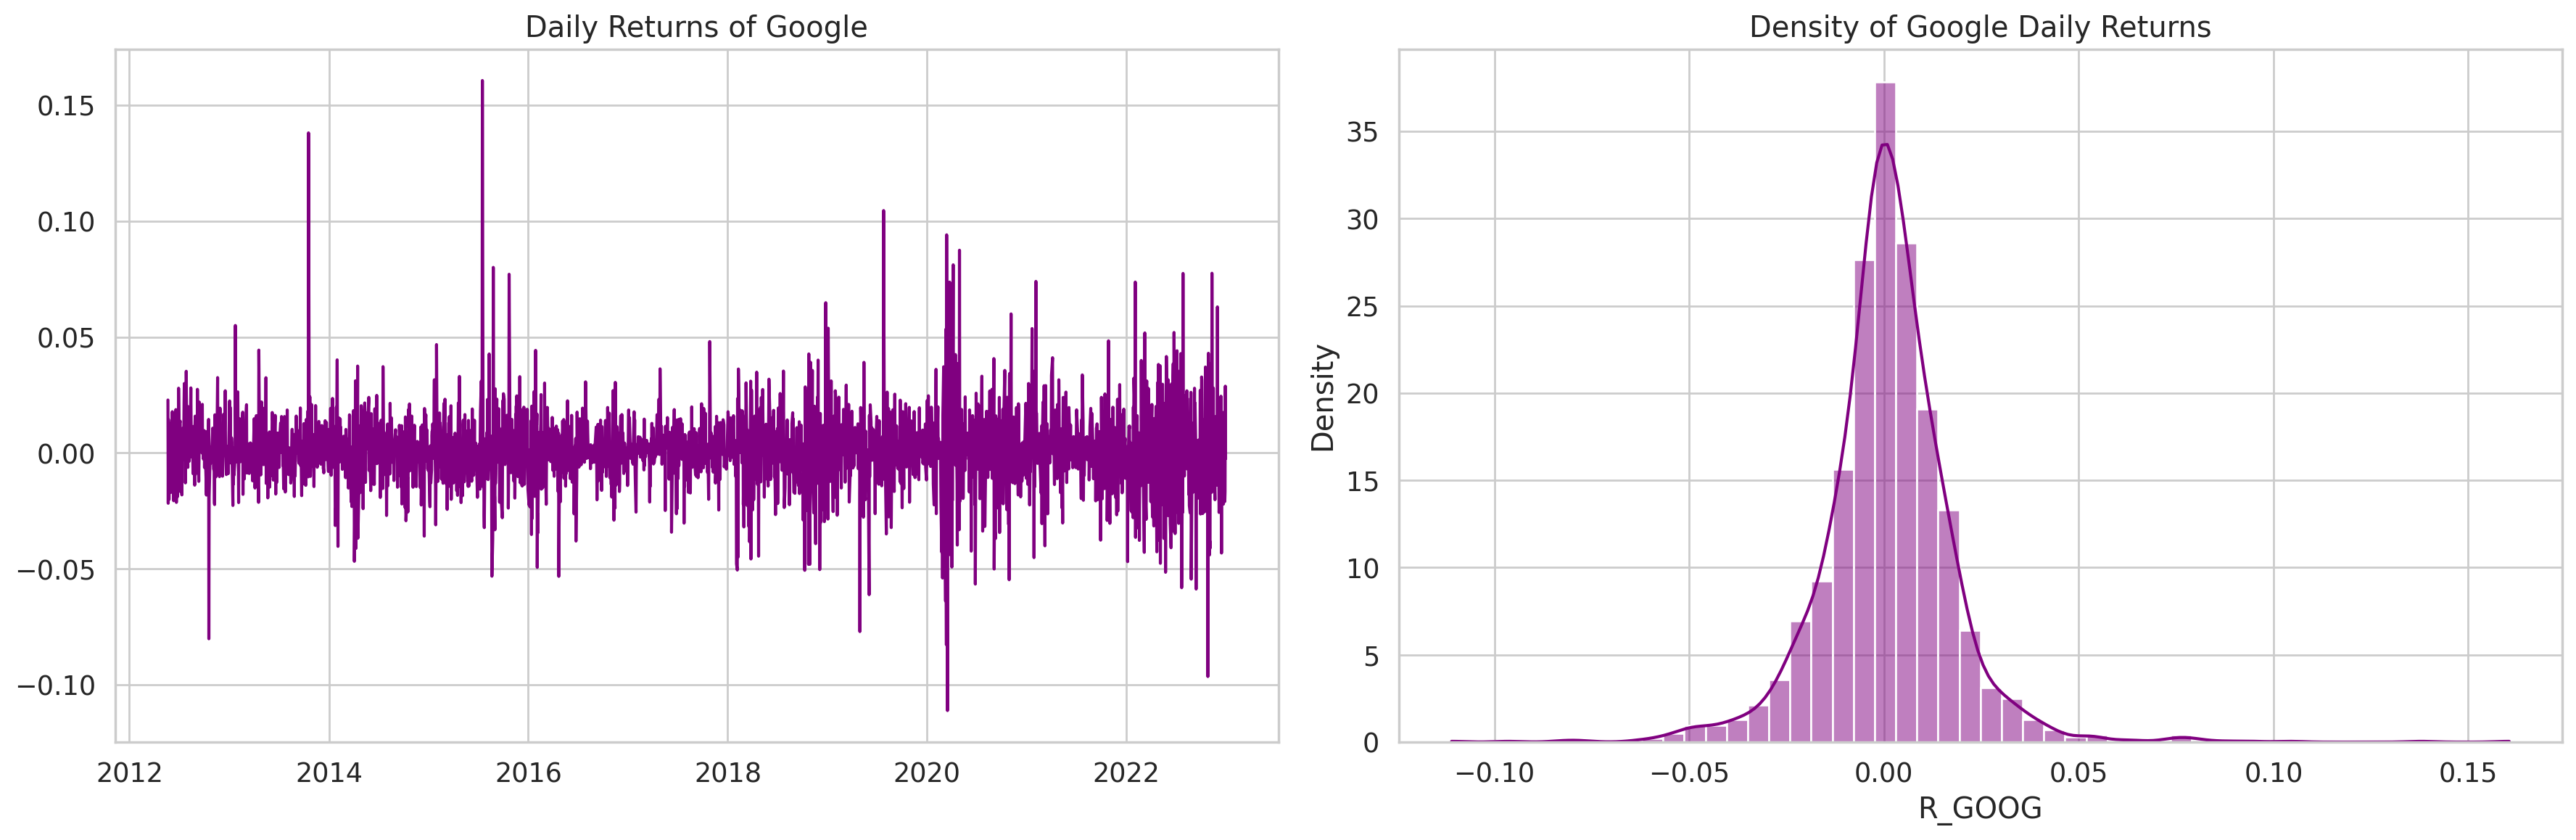

In [141]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Plotting the daily returns of Google
    if not dataset['R_GOOG'].empty:
        axes[0].plot(dataset['R_GOOG'], color='purple')
        axes[0].set_title('Daily Returns of Google')

        # Plotting the density of Google daily returns
        sns.histplot(dataset['R_GOOG'], kde=True, stat="density", color='purple', bins=50, ax=axes[1])
        axes[1].set_title('Density of Google Daily Returns')
    else:
        print("The 'R_GOOG' column is empty!")

    plt.tight_layout()
    plt.show()


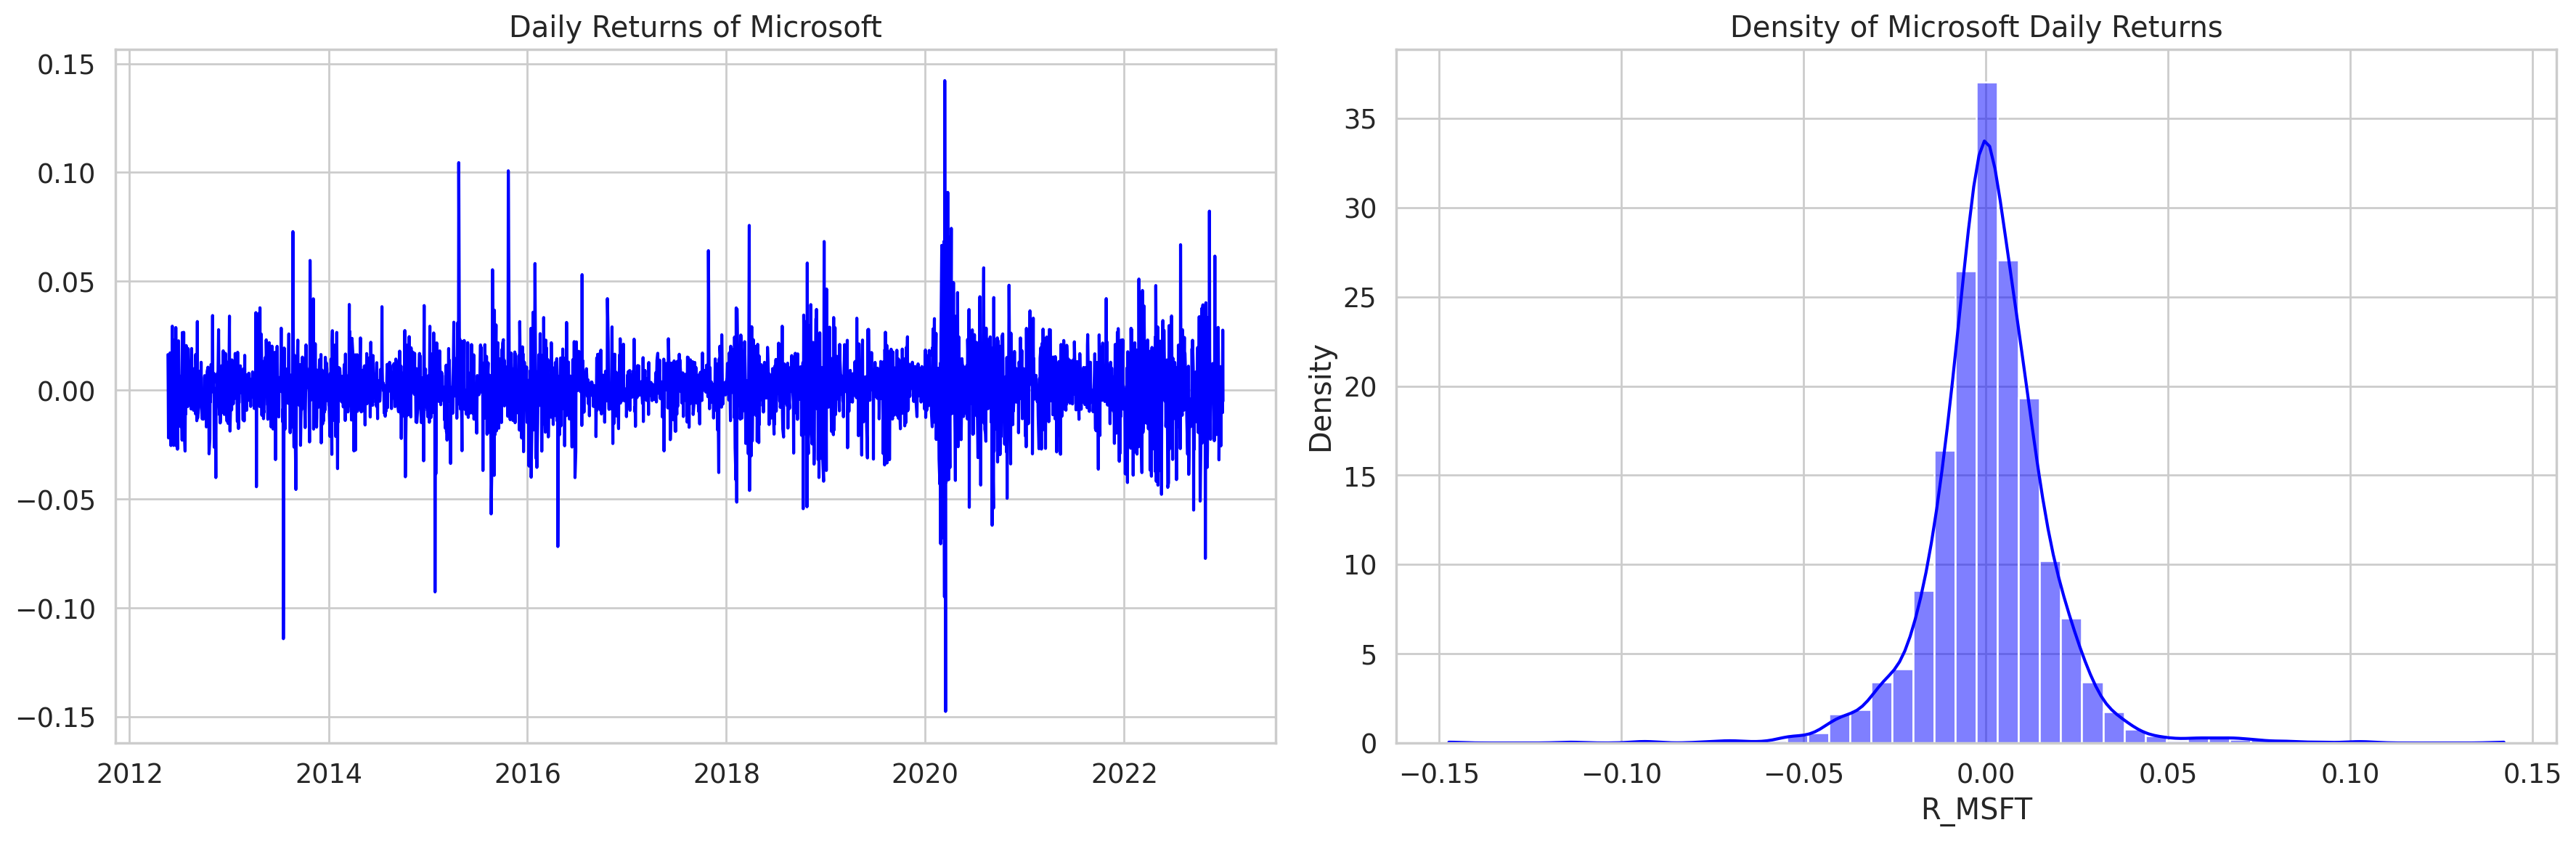

In [142]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Plotting the daily returns of Microsoft
    axes[0].plot(dataset['R_MSFT'], color='blue')
    axes[0].set_title('Daily Returns of Microsoft')

    # Plotting the density of Microsoft daily returns
    sns.histplot(dataset['R_MSFT'], kde=True, stat="density", color='blue', bins=50, ax=axes[1])
    axes[1].set_title('Density of Microsoft Daily Returns')

    plt.tight_layout()
    plt.show()


# Portfolio Optimization using Efficient Frontier

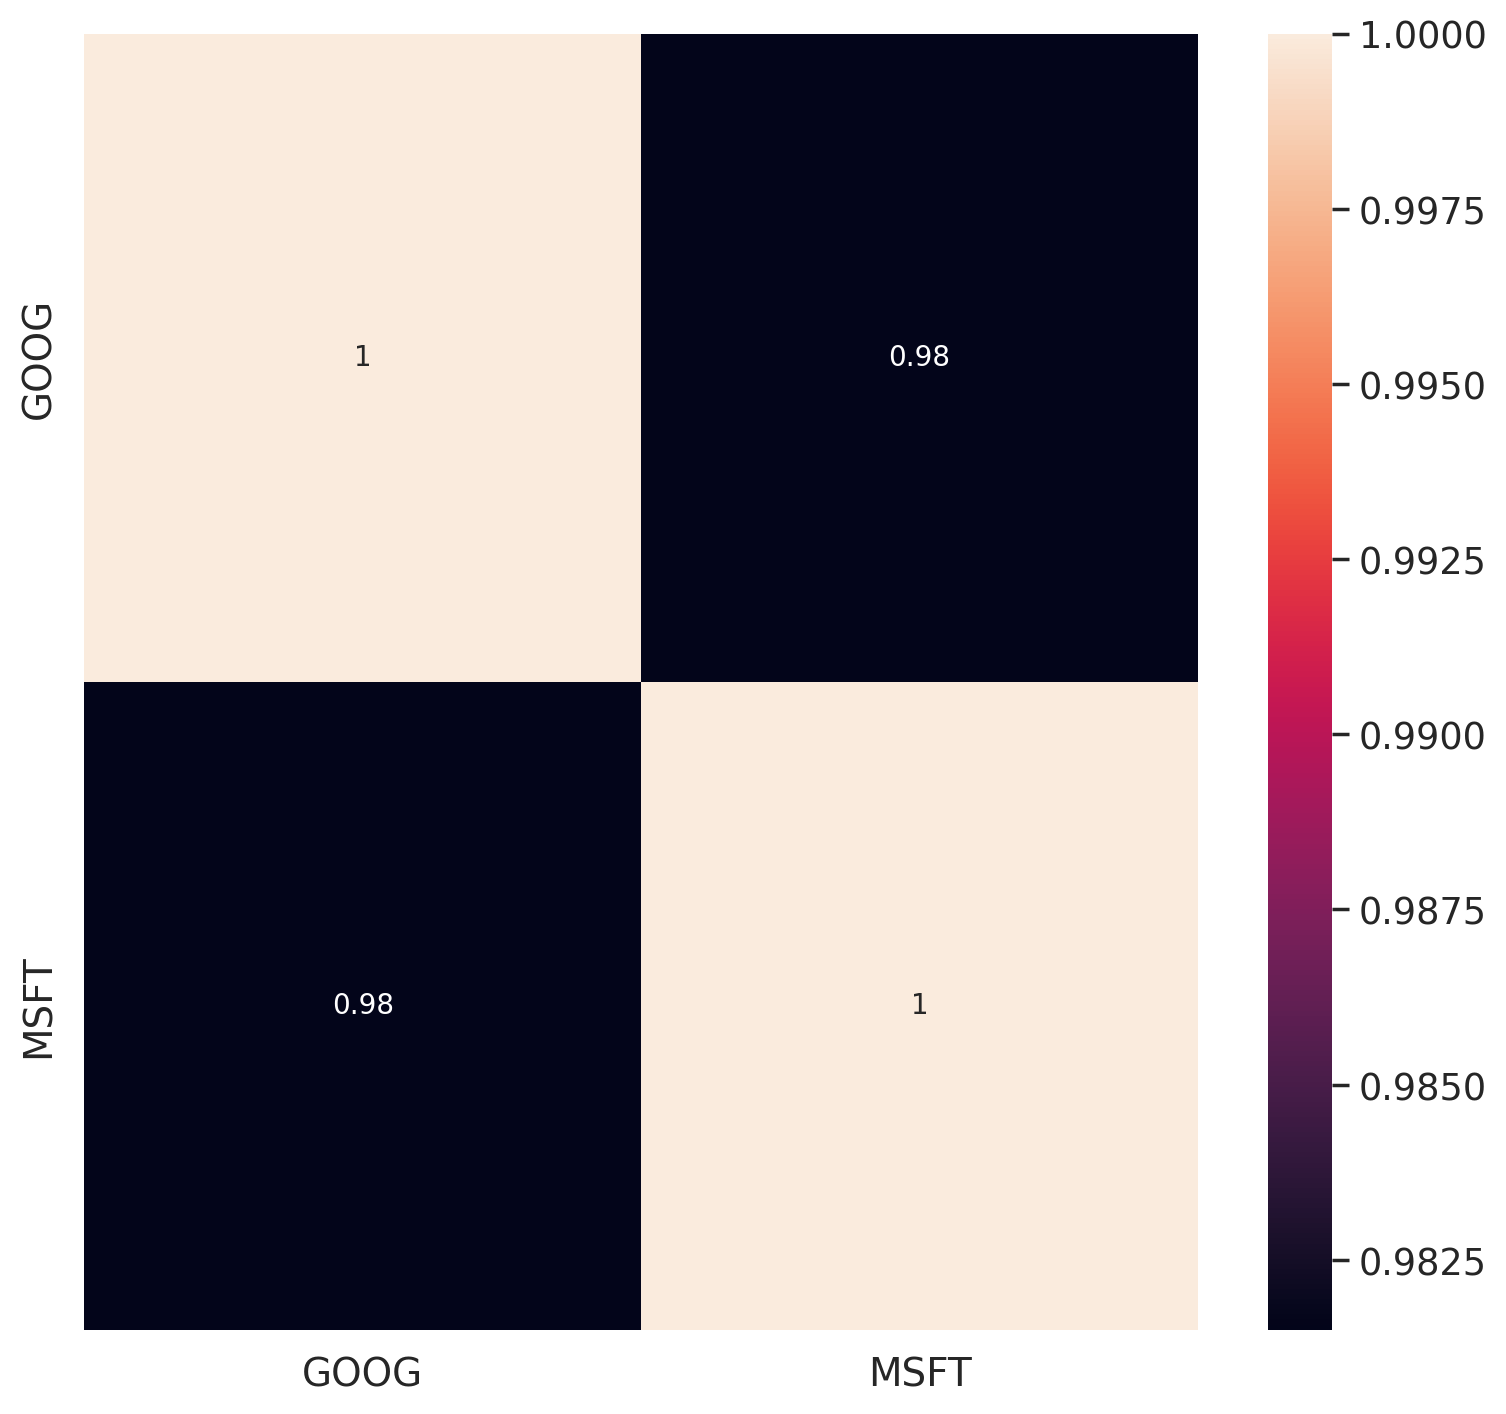

In [143]:
corr = dataset[['GOOG','MSFT']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':10})
heat_map=plt.gcf()
heat_map.set_size_inches(8,8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

### Correlation coefficients between companies' returns

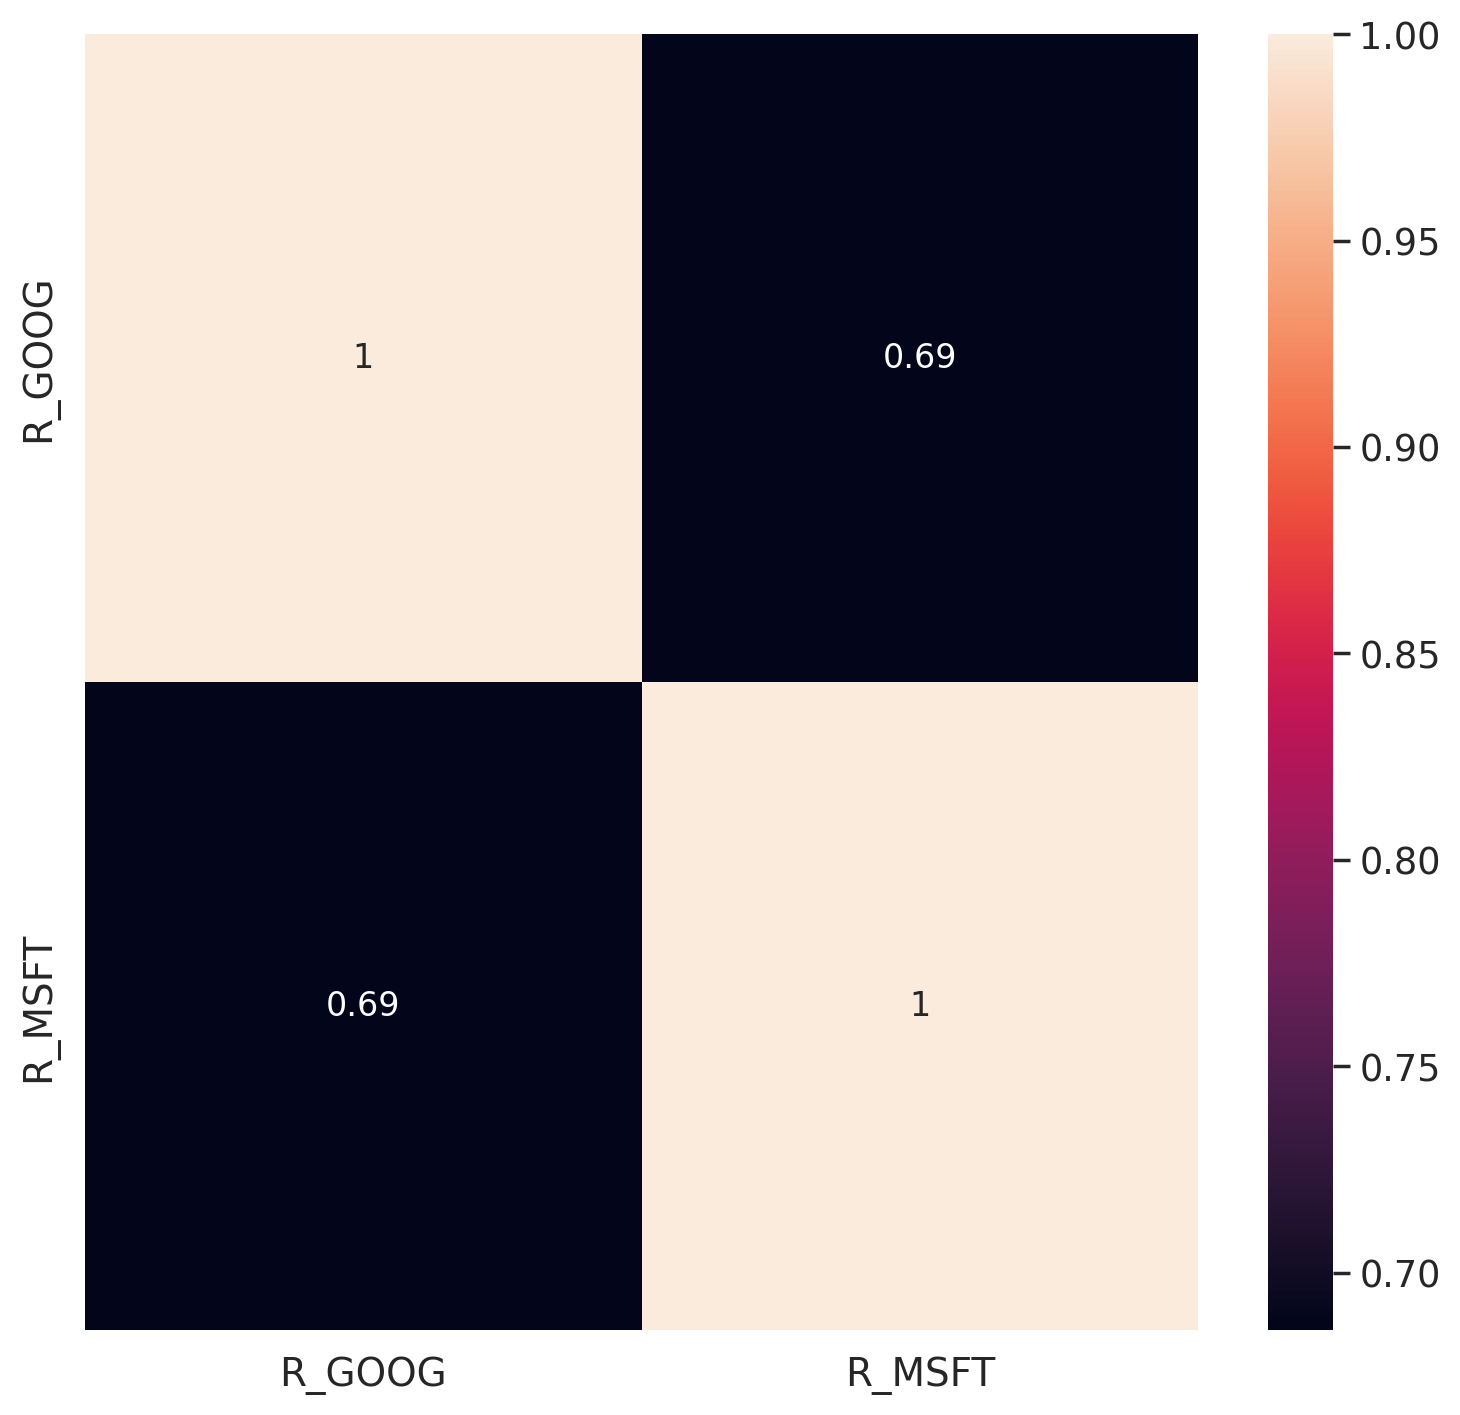

In [144]:
corr = dataset[['R_GOOG','R_MSFT']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(8,8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

In [145]:
returns  = dataset[['R_GOOG','R_MSFT']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_GOOG = 26.82 % per year
The volatility of the stock of R_MSFT = 26.76 % per year


In [146]:
returns  = dataset[['R_GOOG','R_MSFT']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_GOOG = 7.74 % per month
The volatility of the stock of R_MSFT = 7.72 % per month


In [147]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf  ) / volatility
    return sharpe

In [148]:
# Let's consider a risk-free investment with an annual return of 2.5% and
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_GOOG = 0.67
The Sharpe ratio of, R_MSFT = 0.78


In [149]:
cov = returns.cov() * 12 # annualized
cov

,R_GOOG,R_MSFT
R_GOOG,0.003426,0.002345
R_MSFT,0.002345,0.003410


In [150]:
beta_GOOG = cov.iloc[0,1] / cov.iloc[1,1]
print(f'Beta (10Y period) of Google is : {beta_GOOG}')

Beta (10Y period) of Google is : 0.6877608515628888


In [151]:
beta_MSFT = cov.iloc[0,1] / cov.iloc[1,1]
print(f'Beta (10Y period) of Microsoft is : {beta_MSFT}')

Beta (10Y period) of Microsoft is : 0.6877608515628888


In [152]:
from scipy.optimize import minimize

In [153]:
# Portfolio Simulation
portfolio        = 2673  # generation of a portfolio
n_assets         = returns.shape[1]
weights          = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns     = returns.mean()
sigma            = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol     = np.zeros(portfolio)
sharpe_ratio     = np.zeros(portfolio)
rf_rate          = 0.0                          # risk free rate

for i in range(portfolio):
    w                   = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i]     = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i]     = (expected_returns[i]-rf_rate)/expected_vol[i]

In [154]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T,
                          np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):

    return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p    = portfolio_volatility(weight)
    return return_p, vol_p

In [155]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate         = 0.025
    return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():

    def sum_one(weight):
        w= weight
        return np.sum(weight)-1

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()    # w0 is an initila guess

    return minimize(negativeSR,w0,method='SLSQP',
                          bounds  =((0,1),)*n_assets,
                      constraints = weight_constraints)

In [156]:
def min_vol():

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds             = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0,method='SLSQP',
                   bounds      = bounds,
                   constraints = weight_constraints)

In [157]:
def efficient_portfolio_target(target):

    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
                  {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0          = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds      = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0, method = 'SLSQP',
                    bounds      = bounds,
                    constraints = constraints)

In [158]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

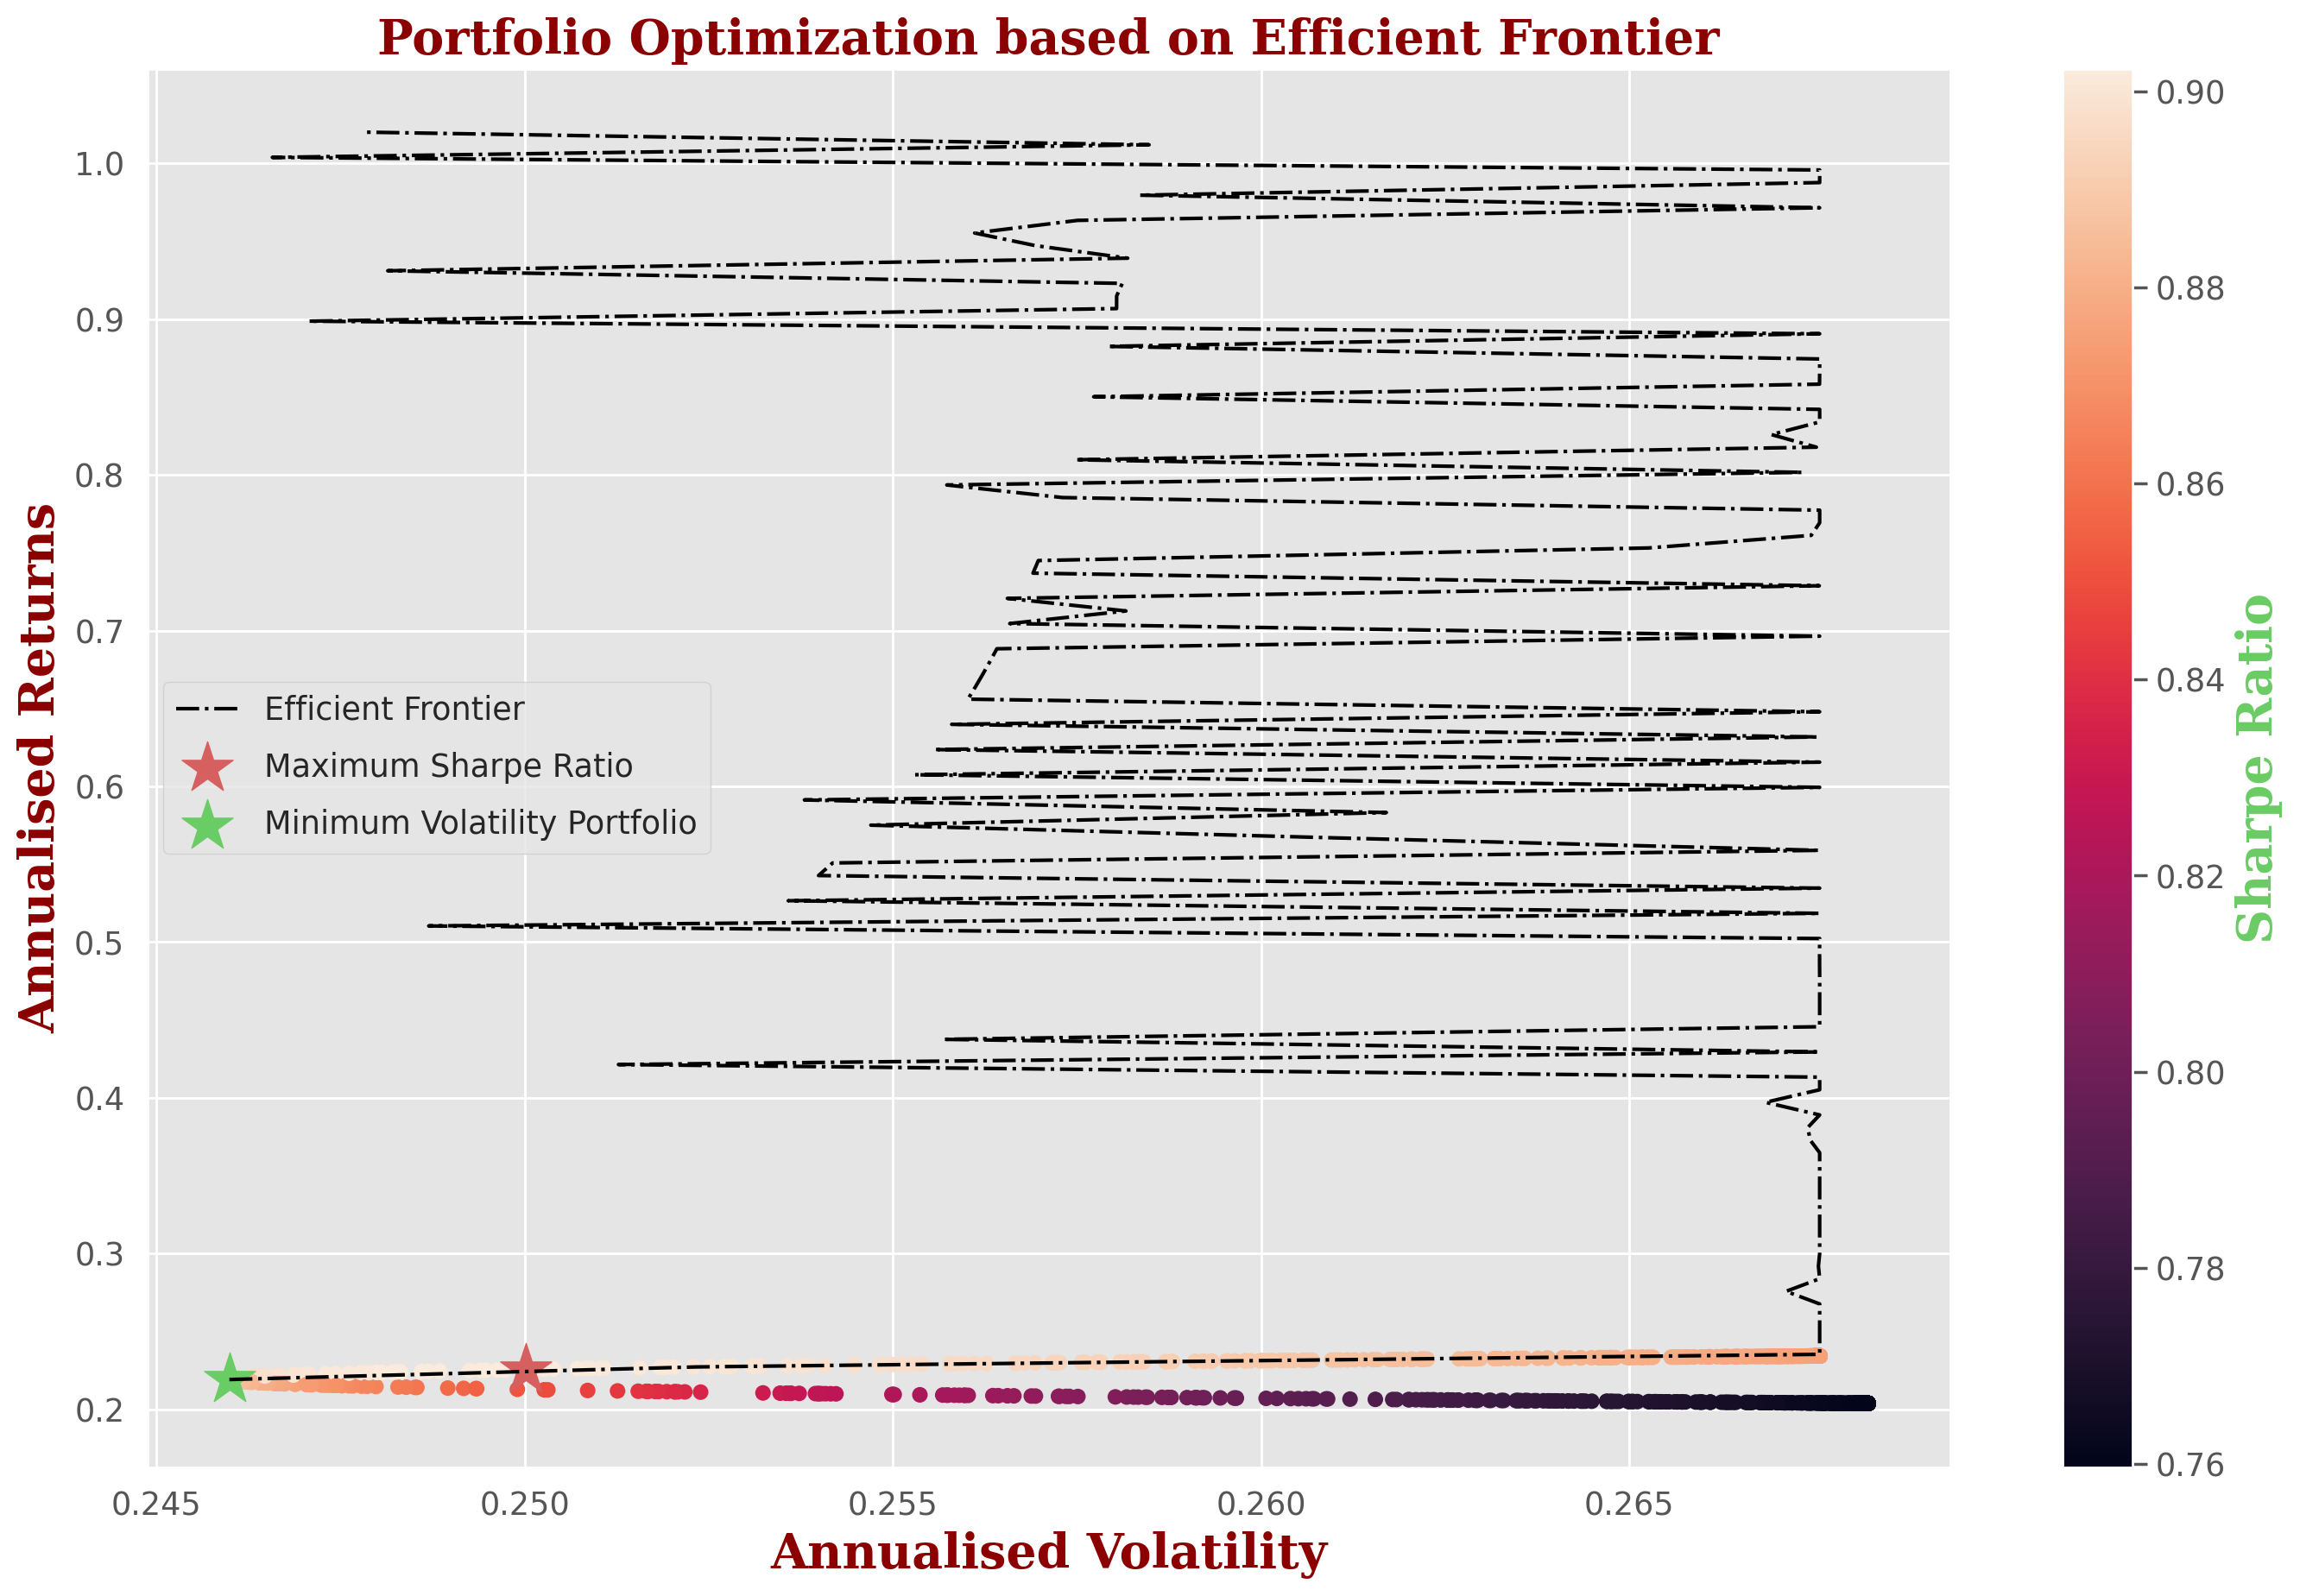

In [159]:
sharpe_maximum      = max_sharpe_ratio()
return_p,vol_p      = portfolio_performance(sharpe_maximum['x'])
min_volatility      = min_vol()
return_min,vol_min  = portfolio_performance(min_volatility['x'])


plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
# plt.colorbar.sel(label = 'Sharpe Ratio',size=20)
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
         label='Efficient Frontier')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maximum Sharpe Ratio')
plt.scatter(vol_min,return_min, c = 'g',  marker ='*', s = 500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier',fontdict=font1)
plt.xlabel('Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.legend(labelspacing=0.8)

In [160]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):# portfolio performance, calculate the annualised return, sharpe ratio
    portfolio_return = np.sum(mean_returns*weights)*252 #252 working days at the stock exchange
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252) # np.dot multiplication of matrices
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf): # random simulation
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights=np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df

In [161]:
tickers = []
for i in dataset[['GOOG','MSFT']].columns:
    tickers.append(i)

In [162]:
mean_returns = dataset[['GOOG','MSFT']].pct_change().mean()
cov = dataset[['GOOG','MSFT']].pct_change().cov()
num_portfolios = 10000
rf = 0.025
results_frame =simulate_random_portfolios(num_portfolios, mean_returns,cov, rf)

In [163]:
results_frame.sum(axis=1)-results_frame["ret"]-results_frame["stdev"]-results_frame["sharpe"];

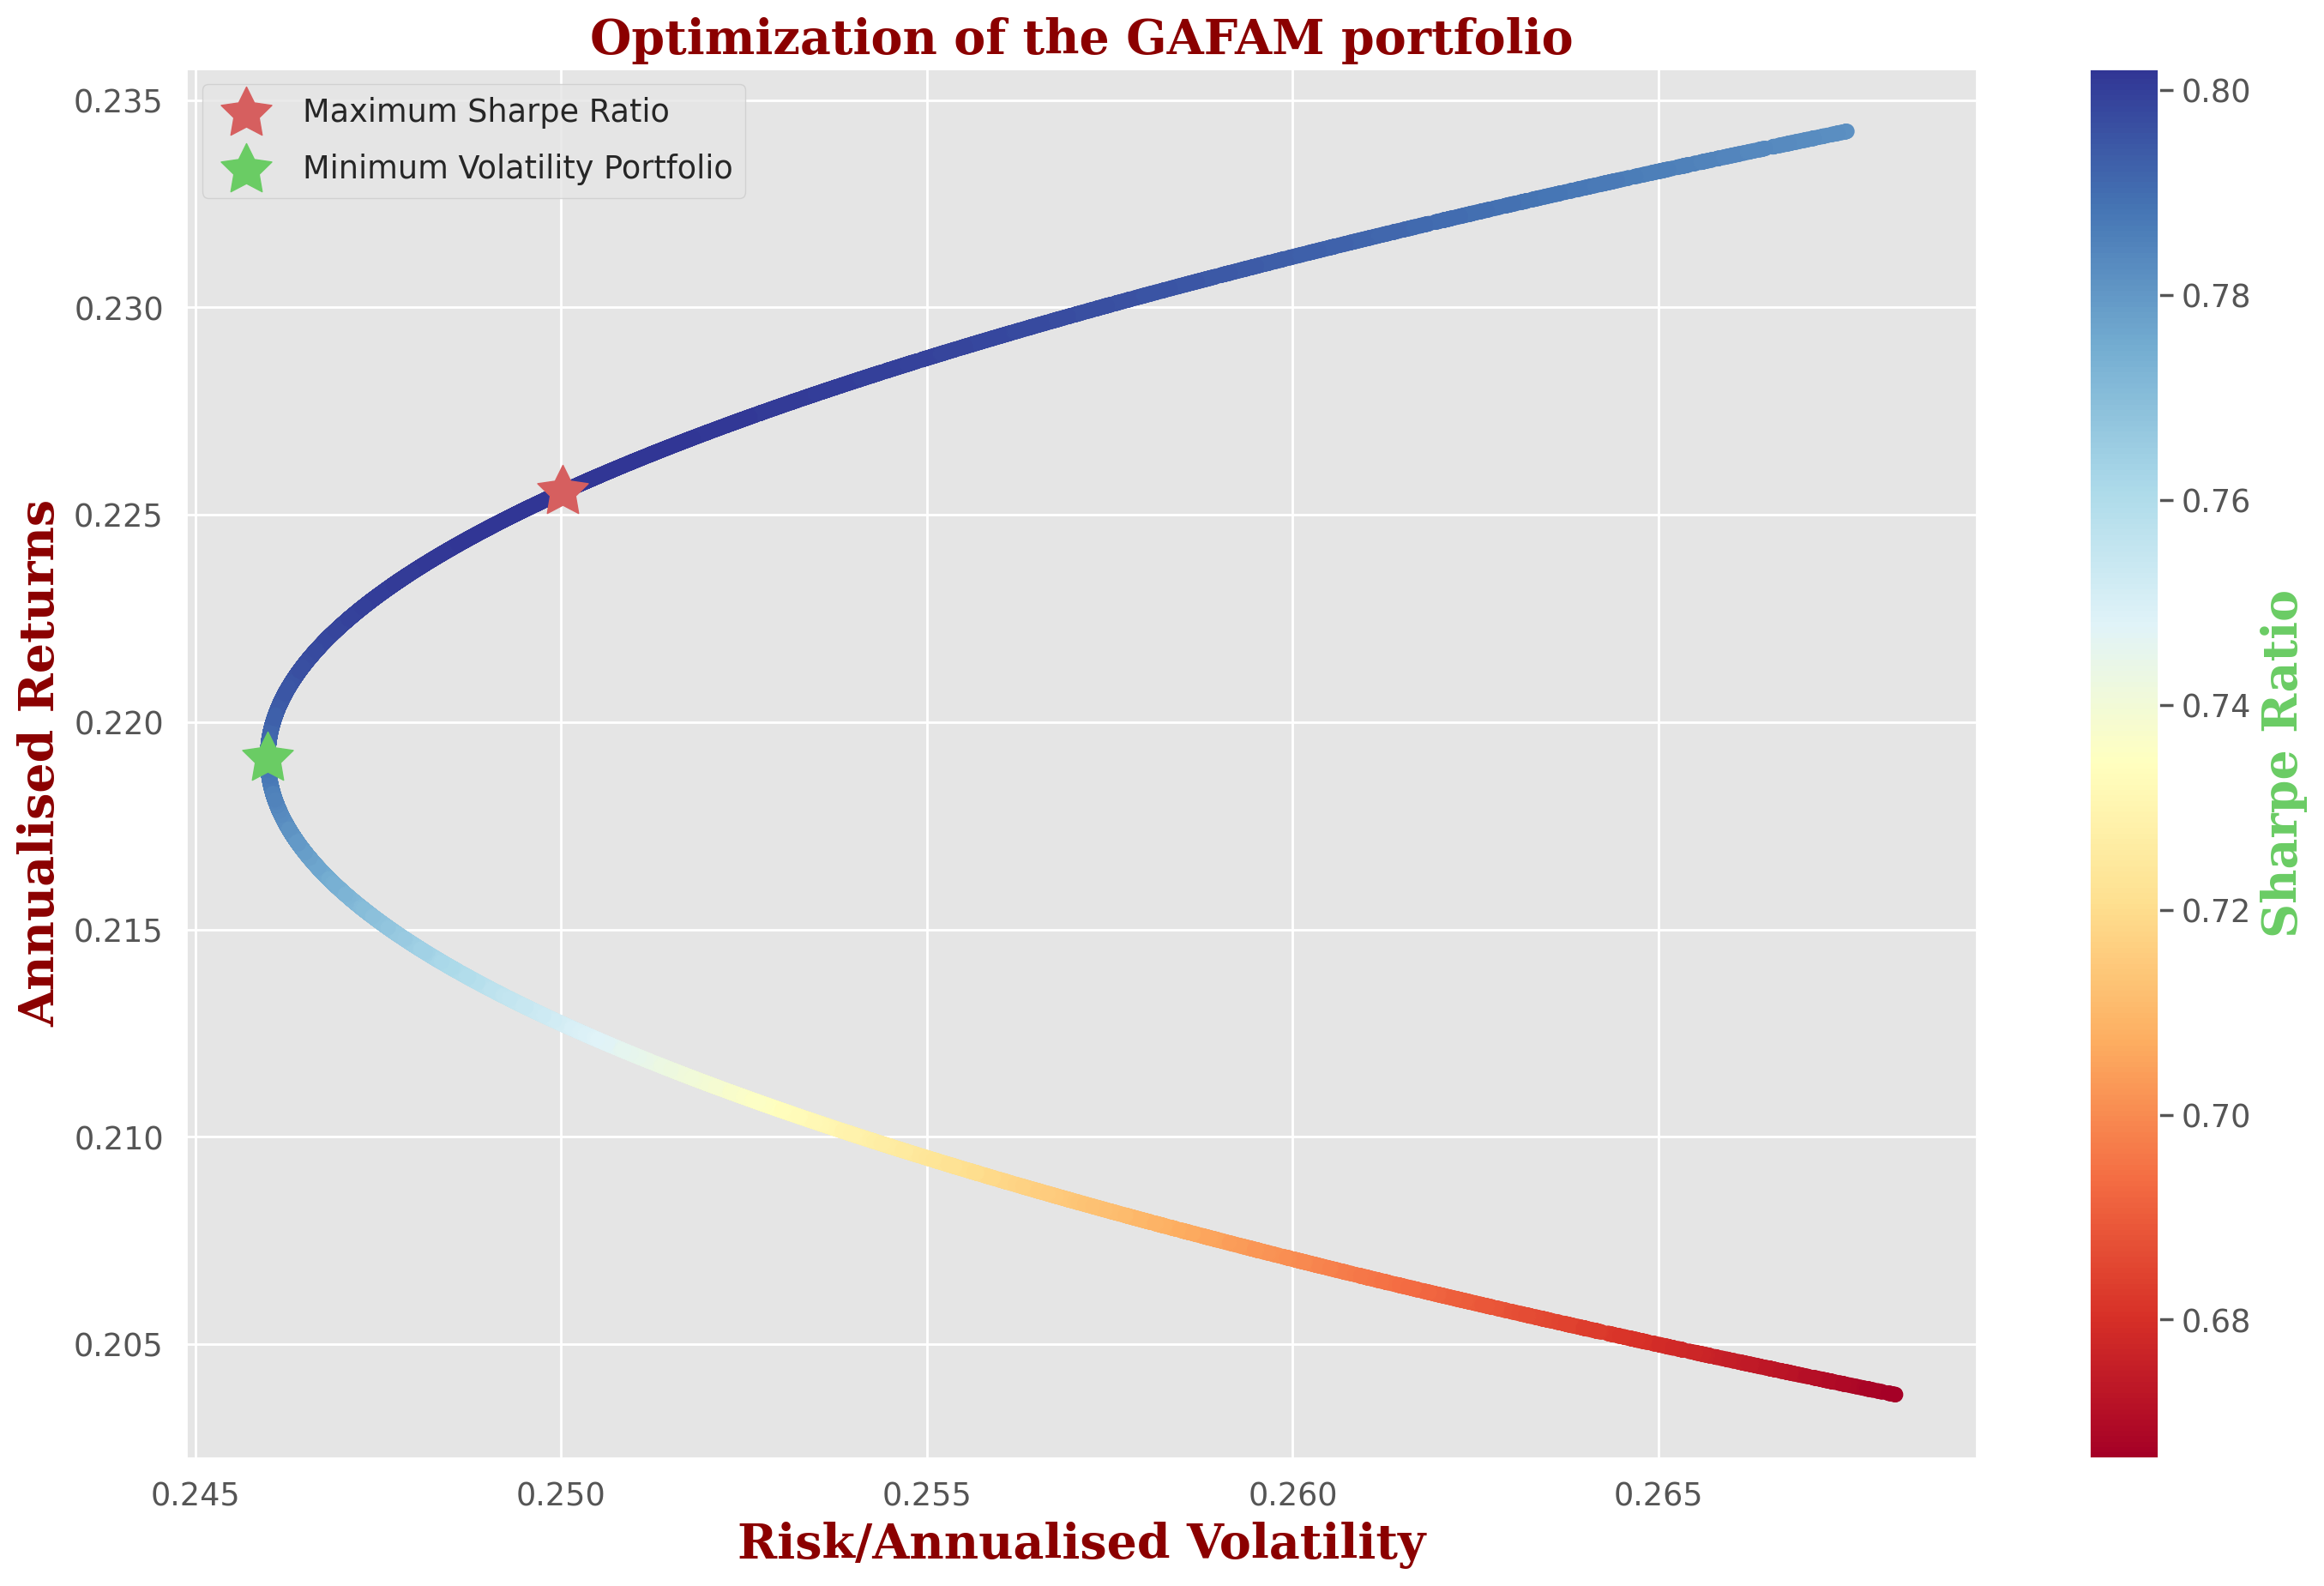

In [164]:
max_sharpe_port=results_frame.iloc[results_frame["sharpe"].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame["stdev"].idxmin()] # min volatility = min variance portfolio vert
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10)) # Number of rows/colums of the subplot grid
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu') #Colormaps in Matplotlib
plt.title('Optimization of the GAFAM portfolio',fontdict=font1)
plt.xlabel('Risk/Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
#plt.colorbar () # match the colorbar
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500, label = 'Maximum Sharpe Ratio')
#plot green star to highlight position of minimum vartance portfolio
plt.scatter(min_vol_port[1] ,min_vol_port[0],marker=(5,1,0),color='g', s=500, label='Minimum Volatility Portfolio')
plt.legend(labelspacing=0.8)
plt.savefig('Portfolio_Optimization_Efficient_Frontier.pdf')
plt.show()

In [165]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,GOOG,MSFT
5282,0.225556,0.250025,0.802145,0.285371,0.714629


In [166]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,GOOG,MSFT
6137,0.219136,0.245991,0.789201,0.496092,0.503908
